# Distance matrix computation for each verses representations 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import nltk as nl

# Load and verify data

In [2]:
Ps = pickle.load(open("data/Ps.pkl", "rb"))
NT = pickle.load(open("data/NT.pkl", "rb"))

NT['verse_part'] = np.ones(len(NT), dtype=int)

display(Ps.shape)
display(Ps)

display(NT.shape)
display(NT)

(3093, 11)

,verse,verse_part,token,pos,lemma,lemma_filtered,stop_words,lexicon,domain,subdomain,type
0,"Ps 1,1",1,"[μακαριος, ανηρ, ος, ουκ, επορευθη, εν, βουλη,...","[ADJ, NOUN, PRON, ADV, VERB, PREP, NOUN, ADJ]","[μακαριος, ανηρ, ος, ου, πορευομαι, εν, βουλη,...","[μακαριος, ανηρ, πορευομαι, βουλη, ασεβης]","[ος, ου, εν]","[ανηρ, ασεβης, βουλη, μακαριος, πορευομαι]","[Physiological Processes and States, People, B...","[Advise, Move,Come/Go, Live,Die, Human Beings,...",Torah and Wisdom Psalm
1,"Ps 1,1",2,"[και, εν, οδω, αμαρτωλων, ουκ, εστη, και, επι,...","[CON, PREP, NOUN, ADJ, ADV, VERB, CON, PREP, N...","[και, εν, οδος, αμαρτωλος, ου, ιστημι, και, επ...","[οδος, αμαρτωλος, ιστημι, καθεδρα, λοιμος, καθ...","[και, εν, ου, και, επι, ου]","[αμαρτωλος, ιστημι, καθεδρα, καθιζω, λοιμος, ο...","[Spacial Dimensions, Linear Movement, Aspect, ...",[High Status or Rank including persons of high...,Torah and Wisdom Psalm
2,"Ps 1,2",1,"[αλλ, η, εν, τω, νομω, κυριου, το, θελημα, αυτου]","[CON, CON, PREP, DET, NOUN, NOUN, DET, NOUN, P...","[αλλα, η, εν, ο, νομος, κυριος, ο, θελημα, αυτος]","[νομος, κυριος, θελημα]","[αλλα, η, εν, ο, ο, αυτος]","[θελημα, κυριος, νομος]","[Status, Supernatural Beings and Powers, Attit...","[Desire,Want,Wish, Have,Possess,Property,Owner...",Torah and Wisdom Psalm
3,"Ps 1,2",2,"[και, εν, τω, νομω, αυτου, μελετησει, ημερας, ...","[CON, PREP, DET, NOUN, PRON, VERB, NOUN, CON, ...","[και, εν, ο, νομος, αυτος, μελεταω, ημερα, και...","[νομος, μελεταω, ημερα, νυξ]","[και, εν, ο, αυτος, και]","[ημερα, μελεταω, νομος, νυξ]","[Time, Courts and Legal Procedures, Communicat...","[To Think,Thought, Judge,Condemn,Acquit, Court...",Torah and Wisdom Psalm
4,"Ps 1,3",1,"[και, εσται, ως, το, ξυλον, το, πεϕυτευμενον, ...","[CON, VERB, ADV, DET, NOUN, CON, DET, PREP, DE...","[και, ειμι, ως, ο, ξυλον, ο, φυτευω, παρα, ο, ...","[ξυλον, φυτευω, διεξοδος, υδωρ]","[και, ειμι, ως, ο, ο, παρα, ο, ο]","[διεξοδος, ξυλον, υδωρ, φυτευω]","[Natural Substances, Geographical Objects and ...","[Instruments Used in Binding and Fastening, Tr...",Torah and Wisdom Psalm
...,...,...,...,...,...,...,...,...,...,...,...
3088,"Ps 151,4",1,"[αυτος, εξαπεστειλεν, τον, αγγελον, αυτου, και...","[PRON, VERB, DET, NOUN, PRON, CON, VERB, PRON,...","[αυτος, εξαποστελλω, ο, αγγελος, αυτος, και, α...","[εξαποστελλω, αγγελος, αιρω, προβατον, πατηρ]","[αυτος, ο, αυτος, και, με, εκ, ο, ο, μου]","[αγγελος, αιρω, εξαποστελλω, πατηρ, προβατον]","[Animals, Status, Guide,Discipline,Follow, Sup...","[To Think,Thought, High Status or Rank includi...",Salvation History Psalm
3089,"Ps 151,4",2,"[και, εχρισεν, με, εν, τω, ελαιω, της, χρισεως...","[CON, VERB, PRON, PREP, DET, NOUN, DET, NOUN, ...","[και, χριω, με, εν, ο, ελαιον, ο, χρισις, αυτος]","[χριω, ελαιον, χρισις]","[και, με, εν, ο, ο, αυτος]","[ελαιον, χρισις, χριω]","[Natural Substances, Physical Events and State...","[Assign to a Role or Function, Care For,Take C...",Salvation History Psalm
3090,"Ps 151,5",1,"[οι, αδελϕοι, μου, καλοι, και, μεγαλοι, και, ο...","[DET, CON, PRON, ADJ, CON, ADJ, CON, ADV, VERB...","[ο, αδελφος, μου, καλος, και, μεγας, και, ου, ...","[αδελφος, καλος, μεγας, ευδοκεω, κυριος]","[ο, μου, και, και, ου, εν, αυτος]","[αδελφος, ευδοκεω, καλος, κυριος, μεγας]","[Status, Time, Degree, Proper,Improper, Moral ...",[High Status or Rank including persons of high...,Salvation History Psalm
3091,"Ps 151,6",1,"[εξηλθον, εις, συναντησιν, τω, αλλοϕυλω, και, ...","[VERB, PREP, NOUN, DET, DET, CON, VERB, PRON, ...","[εξερχομαι, εις, συναντησις, ο, αλλοφυλος, και...","[εξερχομαι, συναντησις, αλλοφυλος, επικαταραομ...","[εις, ο, και, με, εν, ο, αυτος]","[αλλοφυλος, ειδωλον, εξερχομαι, επικαταραομαι,...","[Punish,Reward, Physiological Processes and St...","[Supernatural Beings, Revenge, Obtain Justice,...",Salvation History Psalm


(7939, 10)

,verse,token,lemma,pos,lemma_filtered,stop_words,lexicon,domain,subdomain,verse_part
0,"Mt 1,1","[βιβλος, γενεσεως, ιησου, χριστου, υιου, δαυει...","[βιβλος, γενεσις, ιησους, χριστος, υιος, δαυιδ...","[NOUN, NOUN, PROPN, PROPN, NOUN, PROPN, NOUN, ...","[βιβλος, γενεσις, ιησους, χριστος, υιος, δαυιδ...",[],"[αβρααμ, βιβλος, γενεσις, δαυιδ, ιησους, υιος,...","[Kinship Terms, Supernatural Beings and Powers...","[Socio-Political, Kinship Relations Involving ...",1
1,"Mt 1,2","[αβρααμ, εγεννησεν, τον, ισαακ, ισαακ, δε, εγε...","[αβρααμ, γενναω, ο, ισαακ, ισαακ, δε, γενναω, ...","[PROPN, VERB, DET, PROPN, PROPN, ADV, VERB, DE...","[αβρααμ, γενναω, ισαακ, ισαακ, γενναω, ιακωβ, ...","[ο, δε, ο, δε, ο, και, ο, αυτος]","[αβρααμ, αδελφος, γενναω, ιακωβ, ιουδας, ισαακ]","[Kinship Terms, Be, Become, Exist, Happen, Geo...","[Socio-Political, Socio-Religious, Birth, Proc...",1
2,"Mt 1,3","[ιουδας, δε, εγεννησεν, τον, φαρες, και, τον, ...","[ιουδας, δε, γενναω, ο, φαρες, και, ο, ζαρα, ε...","[PROPN, ADV, VERB, DET, PROPN, CON, DET, PROPN...","[ιουδας, γενναω, φαρες, ζαρα, θαμαρ, φαρες, γε...","[δε, ο, και, ο, εκ, ο, δε, ο, δε, ο]","[αραμ, γενναω, εσρωμ, ζαρα, θαμαρ, ιουδας, φαρες]","[Names of Persons and Places, Be, Become, Exis...","[Birth, Procreation, Change Behavior, Change o...",1
3,"Mt 1,4","[αραμ, δε, εγεννησεν, τον, αμιναδαβ, αμιναδαβ,...","[αραμ, δε, γενναω, ο, αμιναδαβ, αμιναδαβ, δε, ...","[PROPN, ADV, VERB, DET, PROPN, PROPN, ADV, VER...","[αραμ, γενναω, αμιναδαβ, αμιναδαβ, γενναω, ναα...","[δε, ο, δε, ο, δε, ο]","[αμιναδαβ, αραμ, γενναω, ναασσων, σαλμων]","[Names of Persons and Places, Be, Become, Exis...","[Birth, Procreation, Change Behavior, Change o...",1
4,"Mt 1,5","[σαλμων, δε, εγεννησεν, τον, βοες, εκ, της, ρα...","[σαλμων, δε, γενναω, ο, βοες, εκ, ο, ραχαβ, βο...","[PROPN, ADV, VERB, DET, PROPN, PREP, DET, PROP...","[σαλμων, γενναω, βοες, ραχαβ, βοες, γενναω, ιω...","[δε, ο, εκ, ο, δε, ο, εκ, ο, δε, ο]","[βοες, γενναω, ιεσσαι, ιωβηδ, ραχαβ, ρουθ, σαλ...","[Names of Persons and Places, Be, Become, Exis...","[Birth, Procreation, Change Behavior, Change o...",1
...,...,...,...,...,...,...,...,...,...,...
7934,"Re 22,17","[και, το, πνευμα, και, η, νυμφη, λεγουσιν, ερχ...","[και, ο, πνευμα, και, ο, νυμφη, λεγω, ερχομαι,...","[CON, DET, NOUN, CON, DET, NOUN, VERB, VERB, C...","[πνευμα, νυμφη, λεγω, ερχομαι, ακουω, λεγω, ερ...","[και, ο, και, ο, και, ο, και, ο, ο]","[ακουω, διψαω, δωρεαν, εθελω, ερχομαι, ζωη, λα...","[Be, Become, Exist, Happen, Courts and Legal P...","[Be Eager, Be Earnest, In a Devoted Manner, Re...",1
7935,"Re 22,18","[μαρτυρω, εγω, παντι, τω, ακουοντι, τους, λογο...","[μαρτυρεω, εγω, πας, ο, ακουω, ο, λογος, ο, πρ...","[VERB, PRON, PRON, DET, VERB, DET, NOUN, DET, ...","[μαρτυρεω, πας, ακουω, λογος, προφητεια, βιβλι...","[εγω, ο, ο, ο, ο, ουτος, εαν, τις, επι, αυτος,...","[ακουω, βιβλιον, γραφω, επιτιθημι, θεος, λογος...","[Hostility, Strife, Violence, Harm, Destroy, K...","[Cause Trouble, Hardship, Sickness, Disease, W...",1
7936,"Re 22,19","[και, εαν, τις, αφελη, απο, των, λογων, του, β...","[και, εαν, τις, αφαιρεω, απο, ο, λογος, ο, βιβ...","[CON, CON, PRON, VERB, PREP, DET, NOUN, DET, N...","[αφαιρεω, λογος, βιβλιον, προφητεια, αφαιρεω, ...","[και, εαν, τις, απο, ο, ο, ο, ουτος, ο, ο, αυτ...","[αγιος, αφαιρεω, βιβλιον, γραφω, ζωη, θεος, λο...","[Existence in Space, Be, Become, Exist, Happen...","[State, Socio-Political, Socio-Religious, Keep...",1
7937,"Re 22,20","[λεγει, ο, μαρτυρων, ταυτα, ναι, ερχομαι, ταχυ...","[λεγω, ο, μαρτυρεω, ουτος, ναι, ερχομαι, ταχυς...","[VERB, DET, VERB, PRON, INTJ, VERB, ADJ, INTJ,...","[λεγω, μαρτυρεω, ναι, ερχομαι, ταχυς, αμην, ερ...","[ο, ουτος]","[αμην, ερχομαι, ιησους, κυριος, λεγω, μαρτυρεω...","[Supernatural Beings and Powers, Linear Moveme...","[Speak, Talk, Have an Opinion, Hold a View, Mo...",1


# Datasets statistics

In [ ]:
# plot histograms of list length
def plot_histogram_length(df, method):
    """
    Plot histogram of the length of the list of words in a dataframe.
    :param df: dataframe containing the list of words
    :param method: method used to extract the list of words
    """
    lengths = df[method].apply(lambda x: len(x))
    plt.figure(figsize=(6, 2))
    plt.hist(lengths, bins=23, kde=True)
    plt.title(f"Histogram of {method} list length")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.show()

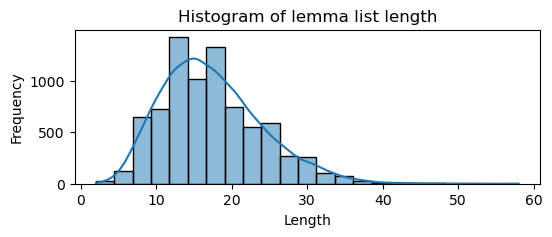

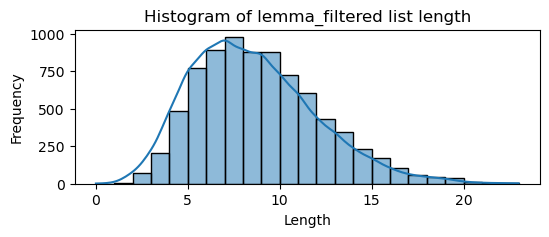

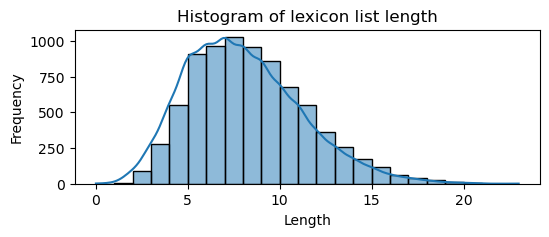

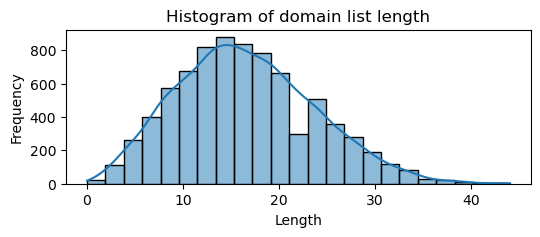

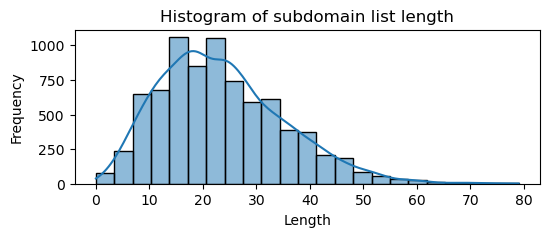

In [6]:
plot_histogram_length(NT, 'lemma')
plot_histogram_length(NT, 'lemma_filtered')
plot_histogram_length(NT, 'lexicon')
plot_histogram_length(NT, 'domain')
plot_histogram_length(NT, 'subdomain')

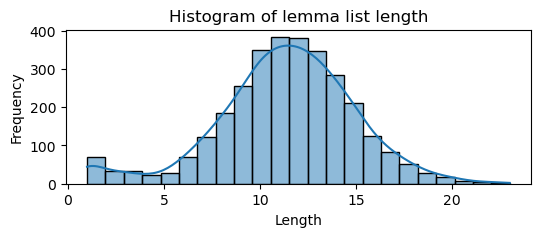

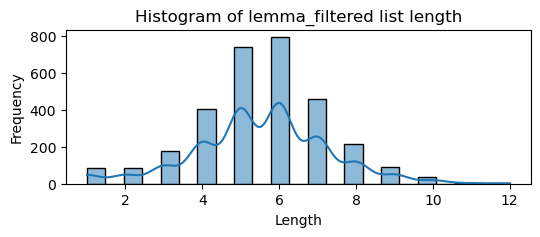

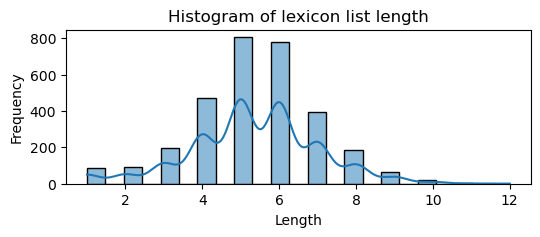

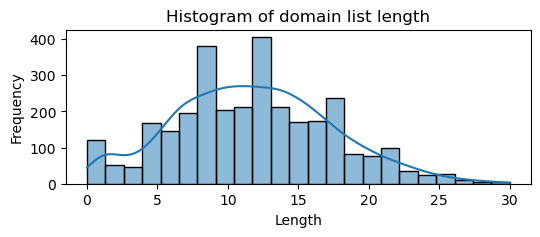

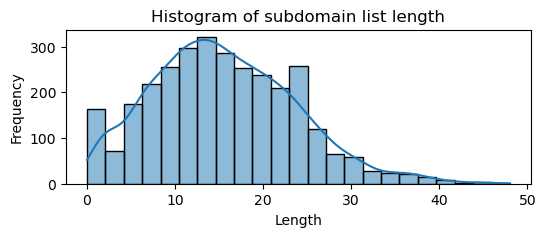

In [7]:
plot_histogram_length(Ps, 'lemma')
plot_histogram_length(Ps, 'lemma_filtered')
plot_histogram_length(Ps, 'lexicon')
plot_histogram_length(Ps, 'domain')
plot_histogram_length(Ps, 'subdomain')

# Edit distance test on 2 verses

In [8]:
# definition of the function to compute the similarity of two lists of words without taking into account the order
def similarity(l1, l2):
    """
    Compute the similarity of two lists of words without taking into account the order.
    :param l1: list of words
    :param l2: list of words
    :return: similarity score
    """
    if len(l1) == 0 or len(l2) == 0:
        return 0
    return len(set(l1) | set(l2)) - min(len(set(l1)),len(set(l2)))


In [ ]:
# Edit distance test on verse
id_verse_1 = "Lk 9,22"
id_verse_2 = "Mk 8,31"

def extract_verse(id_verse,df):   
    extracted_verse = df[df.verse == id_verse].reset_index(drop=True)
    return extracted_verse

# Find the verse in dataframes
v_1 = extract_verse(id_verse_1,NT)
v_2 = extract_verse(id_verse_2,NT)

def compute_distance_verse(v_1,v_2,method,info=False):
    str_v1 = v_1[method][0]
    len_v1 = len(str_v1)
    str_v2 = v_2[method][0]
    len_v2 = len(str_v2)
   
    edit_dist = nl.edit_distance(str_v1, str_v2)  # Raw distance
    # edit_dist = (nl.edit_distance(str_v1, str_v2)-abs(len_v1-len_v2))/min(len_v1,len_v2)  # Normalized distance 1
    # edit_dist = (nl.edit_distance(str_v1, str_v2))/np.max([len_v1,len_v2])  # Normalized distance  2 

    if method == 'lexicon' or method == 'domain' or method == 'subdomain':
        edit_dist = similarity(str_v1, str_v2)  # Raw distance
        # edit_dist = (similarity(str_v1, str_v2)-abs(len_v1-len_v2))/min(len_v1,len_v2)  # Normalized distance 1
        # edit_dist = (similarity(str_v1, str_v2))/np.max([len_v1,len_v2])  # Normalized distance  2  

    if info == True:
        print("\n-----",method,"-----\n")
        print(str_v1)
        print(str_v2)
        print(f"Edit distance between 2 verses :",edit_dist)

    return edit_dist

compute_distance_verse(v_1,v_2,'token',True)
compute_distance_verse(v_1,v_2,'lemma',True)
compute_distance_verse(v_1,v_2,'lemma_filtered',True)
compute_distance_verse(v_1,v_2,'stop_words',True)
compute_distance_verse(v_1,v_2,'pos',True)
compute_distance_verse(v_1,v_2,'lexicon',True)
compute_distance_verse(v_1,v_2,'domain',True)
compute_distance_verse(v_1,v_2,'subdomain',True)



----- token -----

['ειπων', 'οτι', 'δει', 'τον', 'υιον', 'του', 'ανθρωπου', 'πολλα', 'παθειν', 'και', 'αποδοκιμασθηναι', 'απο', 'των', 'πρεσβυτερων', 'και', 'αρχιερεων', 'και', 'γραμματεων', 'και', 'αποκτανθηναι', 'και', 'τη', 'τριτη', 'ημερα', 'εγερθηναι']
['και', 'ηρξατο', 'διδασκειν', 'αυτους', 'οτι', 'δει', 'τον', 'υιον', 'του', 'ανθρωπου', 'πολλα', 'παθειν', 'και', 'αποδοκιμασθηναι', 'υπο', 'των', 'πρεσβυτερων', 'και', 'των', 'αρχιερεων', 'και', 'των', 'γραμματεων', 'και', 'αποκτανθηναι', 'και', 'μετα', 'τρεις', 'ημερας', 'αναστηναι']
Edit distance between 2 verses : 11

----- lemma -----

['λεγω', 'οτι', 'δει', 'ο', 'υιος', 'ο', 'ανθρωπος', 'πολυς', 'πασχω', 'και', 'αποδοκιμαζω', 'απο', 'ο', 'πρεσβυς', 'και', 'αρχιερευς', 'και', 'γραμματευς', 'και', 'αποκτεινω', 'και', 'ο', 'τριτος', 'ημερα', 'εγειρω']
['και', 'αρχω', 'διδασκω', 'αυτος', 'οτι', 'δει', 'ο', 'υιος', 'ο', 'ανθρωπος', 'πολυς', 'πασχω', 'και', 'αποδοκιμαζω', 'υπο', 'ο', 'πρεσβυς', 'και', 'ο', 'αρχιερευς', 'και', 'ο'

10

In [ ]:
# Edit distance test on verse
id_verse_1 = "Mt 16,17"
id_verse_2 = "Ps 90,8"

def extract_verse(id_verse,df):   
    extracted_verse = df[df.verse == id_verse].reset_index(drop=True)
    return extracted_verse

# Find the verse in dataframes
v_1 = extract_verse(id_verse_1,NT)
v_2 = extract_verse(id_verse_2,Ps)

compute_distance_verse(v_1,v_2,'token',True)
compute_distance_verse(v_1,v_2,'lemma',True)
compute_distance_verse(v_1,v_2,'lemma_filtered',True)
compute_distance_verse(v_1,v_2,'stop_words',True)
compute_distance_verse(v_1,v_2,'pos',True)
compute_distance_verse(v_1,v_2,'lexicon',True)
compute_distance_verse(v_1,v_2,'domain',True)
compute_distance_verse(v_1,v_2,'subdomain',True)



----- token -----

['αποκριθεις', 'δε', 'ο', 'ιησους', 'ειπεν', 'αυτω', 'μακαριος', 'ει', 'σιμων', 'βαριωνα', 'οτι', 'σαρξ', 'και', 'αιμα', 'ουκ', 'απεκαλυψεν', 'σοι', 'αλλ’', 'ο', 'πατηρ', 'μου', 'ο', 'εν', 'τοις', 'ουρανοις']
['πλην', 'τοις', 'οϕθαλμοις', 'σου', 'κατανοησεις', 'και', 'ανταποδοσιν', 'αμαρτωλων', 'οψη']
Edit distance between 2 verses : 24

----- lemma -----

['αποκρινω', 'δε', 'ο', 'ιησους', 'λεγω', 'αυτος', 'μακαριος', 'ειμι', 'σιμων', 'βαριωνα', 'οτι', 'σαρξ', 'και', 'αιμα', 'ου', 'αποκαλυπτω', 'συ', 'αλλα', 'ο', 'πατηρ', 'εγω', 'ο', 'εν', 'ο', 'ουρανος']
['πλην', 'ο', 'οφθαλμος', 'σου', 'κατανοεω', 'και', 'ανταποδοσις', 'αμαρτωλος', 'οραω']
Edit distance between 2 verses : 23

----- lemma_filtered -----

['αποκρινω', 'ιησους', 'λεγω', 'μακαριος', 'σιμων', 'βαριωνα', 'σαρξ', 'αιμα', 'αποκαλυπτω', 'πατηρ', 'ουρανος']
['πλην', 'οφθαλμος', 'κατανοεω', 'ανταποδοσις', 'αμαρτωλος', 'οραω']
Edit distance between 2 verses : 11

----- stop_words -----

['δε', 'ο', 'αυτος', '

27

# Distance matrix computation

In [11]:
def compute_distance(l1,l2,ordered=True):
    """
    Compute the distance between two lists of words.
    :param l1: list of words
    :param l2: list of words
    :param ordered: if True, the order of the words is taken into account
    :return: distance score
    """
    if ordered:
        return nl.edit_distance(l1, l2)
    else:
        return similarity(l1, l2)

In [12]:
def distance_matrix(df_1,df_2,method):
    len_df_1 = df_1.shape[0]
    len_df_2 = df_2.shape[0]

    ordered = True
    if method == 'lexicon' or method == 'domain' or method == 'subdomain':
        ordered = False

    D = np.zeros((len_df_1,len_df_2))
    for i in tqdm(range(len_df_1)):
        for j in range(len_df_2):
            D[i,j] = compute_distance(df_1.loc[i,method],df_2.loc[j,method],ordered)
    return D

In [ ]:
D = {}
for i, method in enumerate(['token','lemma','pos','stop_words', 'lemma_filtered', 'lexicon', 'domain','subdomain']):
    D[method] = distance_matrix(Ps,NT,method)

  0%|          | 0/3093 [00:00<?, ?it/s]

100%|██████████| 3093/3093 [03:37<00:00, 14.24it/s]


In [15]:
with open("distance_matrices/Ps_NT.pkl", "wb") as file:
    pickle.dump(D, file, protocol=pickle.HIGHEST_PROTOCOL)

# Normalize distance matrices

In [3]:
D = pickle.load(open("distance_matrices/Ps_NT.pkl","rb"))

In [ ]:
from copy import copy, deepcopy

methods = ['token','lemma','pos','stop_words', 'lemma_filtered', 'lexicon', 'domain','subdomain']

Dn1 = deepcopy(D)
for method in methods:
    print(method)
    for i in tqdm(range(D[method].shape[0])):
        for j in range(D[method].shape[1]):
            Dn1[method][i,j] /= np.max([len(Ps.loc[i,method]),len(NT.loc[j,method])])

token


100%|██████████| 3093/3093 [03:44<00:00, 13.78it/s]


lemma


100%|██████████| 3093/3093 [03:41<00:00, 13.97it/s]


pos


100%|██████████| 3093/3093 [03:39<00:00, 14.09it/s]


lemma_filtered


100%|██████████| 3093/3093 [03:38<00:00, 14.12it/s]


stop_words


  0%|          | 12/3093 [00:00<03:38, 14.10it/s]/tmp/ipykernel_31848/647016175.py:10: RuntimeWarning: invalid value encountered in scalar divide
  Dn1[method][i,j] /= np.max([len(Ps.loc[i,method]),len(NT.loc[j,method])])
100%|██████████| 3093/3093 [03:41<00:00, 13.95it/s]


lexicon


100%|██████████| 3093/3093 [03:41<00:00, 13.98it/s]


domain


100%|██████████| 3093/3093 [03:40<00:00, 14.01it/s]


subdomain


100%|██████████| 3093/3093 [03:40<00:00, 14.01it/s]


In [5]:
Dn2 = deepcopy(D)
for method in methods:
    print(method)
    for i in tqdm(range(D[method].shape[0])):
        for j in range(D[method].shape[1]):
            len1 = len(Ps.loc[i,method])
            len2 = len(NT.loc[j,method])
            Dn2[method][i,j] = (Dn2[method][i,j] - abs(len1-len2)) / np.min([len1,len2])

token


100%|██████████| 3093/3093 [03:47<00:00, 13.61it/s]


lemma


100%|██████████| 3093/3093 [03:44<00:00, 13.79it/s]


pos


100%|██████████| 3093/3093 [03:48<00:00, 13.52it/s]


lemma_filtered


  0%|          | 0/3093 [00:00<?, ?it/s]/tmp/ipykernel_31848/467438178.py:8: RuntimeWarning: invalid value encountered in scalar divide
  Dn2[method][i,j] = (Dn2[method][i,j] - abs(len1-len2)) / np.min([len1,len2])
100%|██████████| 3093/3093 [03:52<00:00, 13.29it/s]


stop_words


100%|██████████| 3093/3093 [03:52<00:00, 13.30it/s]


lexicon


  0%|          | 0/3093 [00:00<?, ?it/s]/tmp/ipykernel_31848/467438178.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  Dn2[method][i,j] = (Dn2[method][i,j] - abs(len1-len2)) / np.min([len1,len2])
100%|██████████| 3093/3093 [03:44<00:00, 13.76it/s]


domain


100%|██████████| 3093/3093 [03:44<00:00, 13.76it/s]


subdomain


100%|██████████| 3093/3093 [03:45<00:00, 13.75it/s]


# Save in Distance_matrices folder

In [7]:
with open("distance_matrices/Ps_NT_norm1.pkl", "wb") as file:
    pickle.dump(Dn1, file, protocol=pickle.HIGHEST_PROTOCOL)
with open("distance_matrices/Ps_NT_norm2.pkl", "wb") as file:
    pickle.dump(Dn2, file, protocol=pickle.HIGHEST_PROTOCOL)